In [14]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

# Update(2022-11-03): Fix pyglet compatability issue since it is updated to 2.0.0 recently.
!pip install "pyglet<2.0.0"

  Cloning https://github.com/metadriverse/metadrive to /tmp/pip-req-build-qbhix50c
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /tmp/pip-req-build-qbhix50c
  Resolved https://github.com/metadriverse/metadrive to commit b8a66c92ac34a5f80944b41600fed08d8e3a90ee
  Preparing metadata (setup.py) ... done
  Created wheel for metadrive-simulator: filename=metadrive_simulator-0.4.1.2-py3-none-any.whl size=54955185 sha256=0e5ace54a460e04dbf3875466864b363f35c66c53a27a3b079234224a481fa67
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1qzckmt/wheels/58/e4/2d/163252a989b39400e4da6689a8b750da35301f6683f130b925
Successfully built metadrive-simulator
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.0.0
    Uninstalling importlib-metadata-6.0.0:
      Successfully uninstalled importlib-metadata-6.0.0
Start to profile the efficiency of MetaDrive with 1000 maps and ~4 vehicles!
[INFO] Environment: Meta

In [2]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs260R'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs260R'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs260R'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


I guess you are running locally. If you get this message in Colab, check the files.


In [3]:
!python train_AC.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

/home/acthegreat/work/actor critic with summarization/core
Training Step:   2%|▍                    | 1001/50000 [00:00<00:10, 4597.12it/s]
 ===== AC Training Step 1199 =====:
  actor_loss: 10.644075393676758
  critic_loss: 0.551606297492981
  current_q1: -10.913856506347656
  episode_reward: -1297.1835428569623
  frame_per_second: 1567
  log_dir: Pendulum-v1
  reward: -6.487128257751465
  target_q: -10.92753791809082
  total_episodes: 6
  total_steps: 1199
  total_time: 0.7647430896759033

Training Step:   4%|▉                     | 2177/50000 [00:03<01:52, 424.60it/s]
 ===== AC Training Step 2199 =====:
  actor_loss: 39.24481964111328
  critic_loss: 4.330598831176758
  current_q1: -39.26604080200195
  episode_reward: -1418.420757023182
  frame_per_second: 627
  log_dir: Pendulum-v1
  reward: -7.084522247314453
  target_q: -39.60997009277344
  total_episodes: 11
  total_steps: 2199
  total_time: 3.505403757095337

Training Step:   6%|█▍                    | 3176/50000 [00:06<02:11, 35

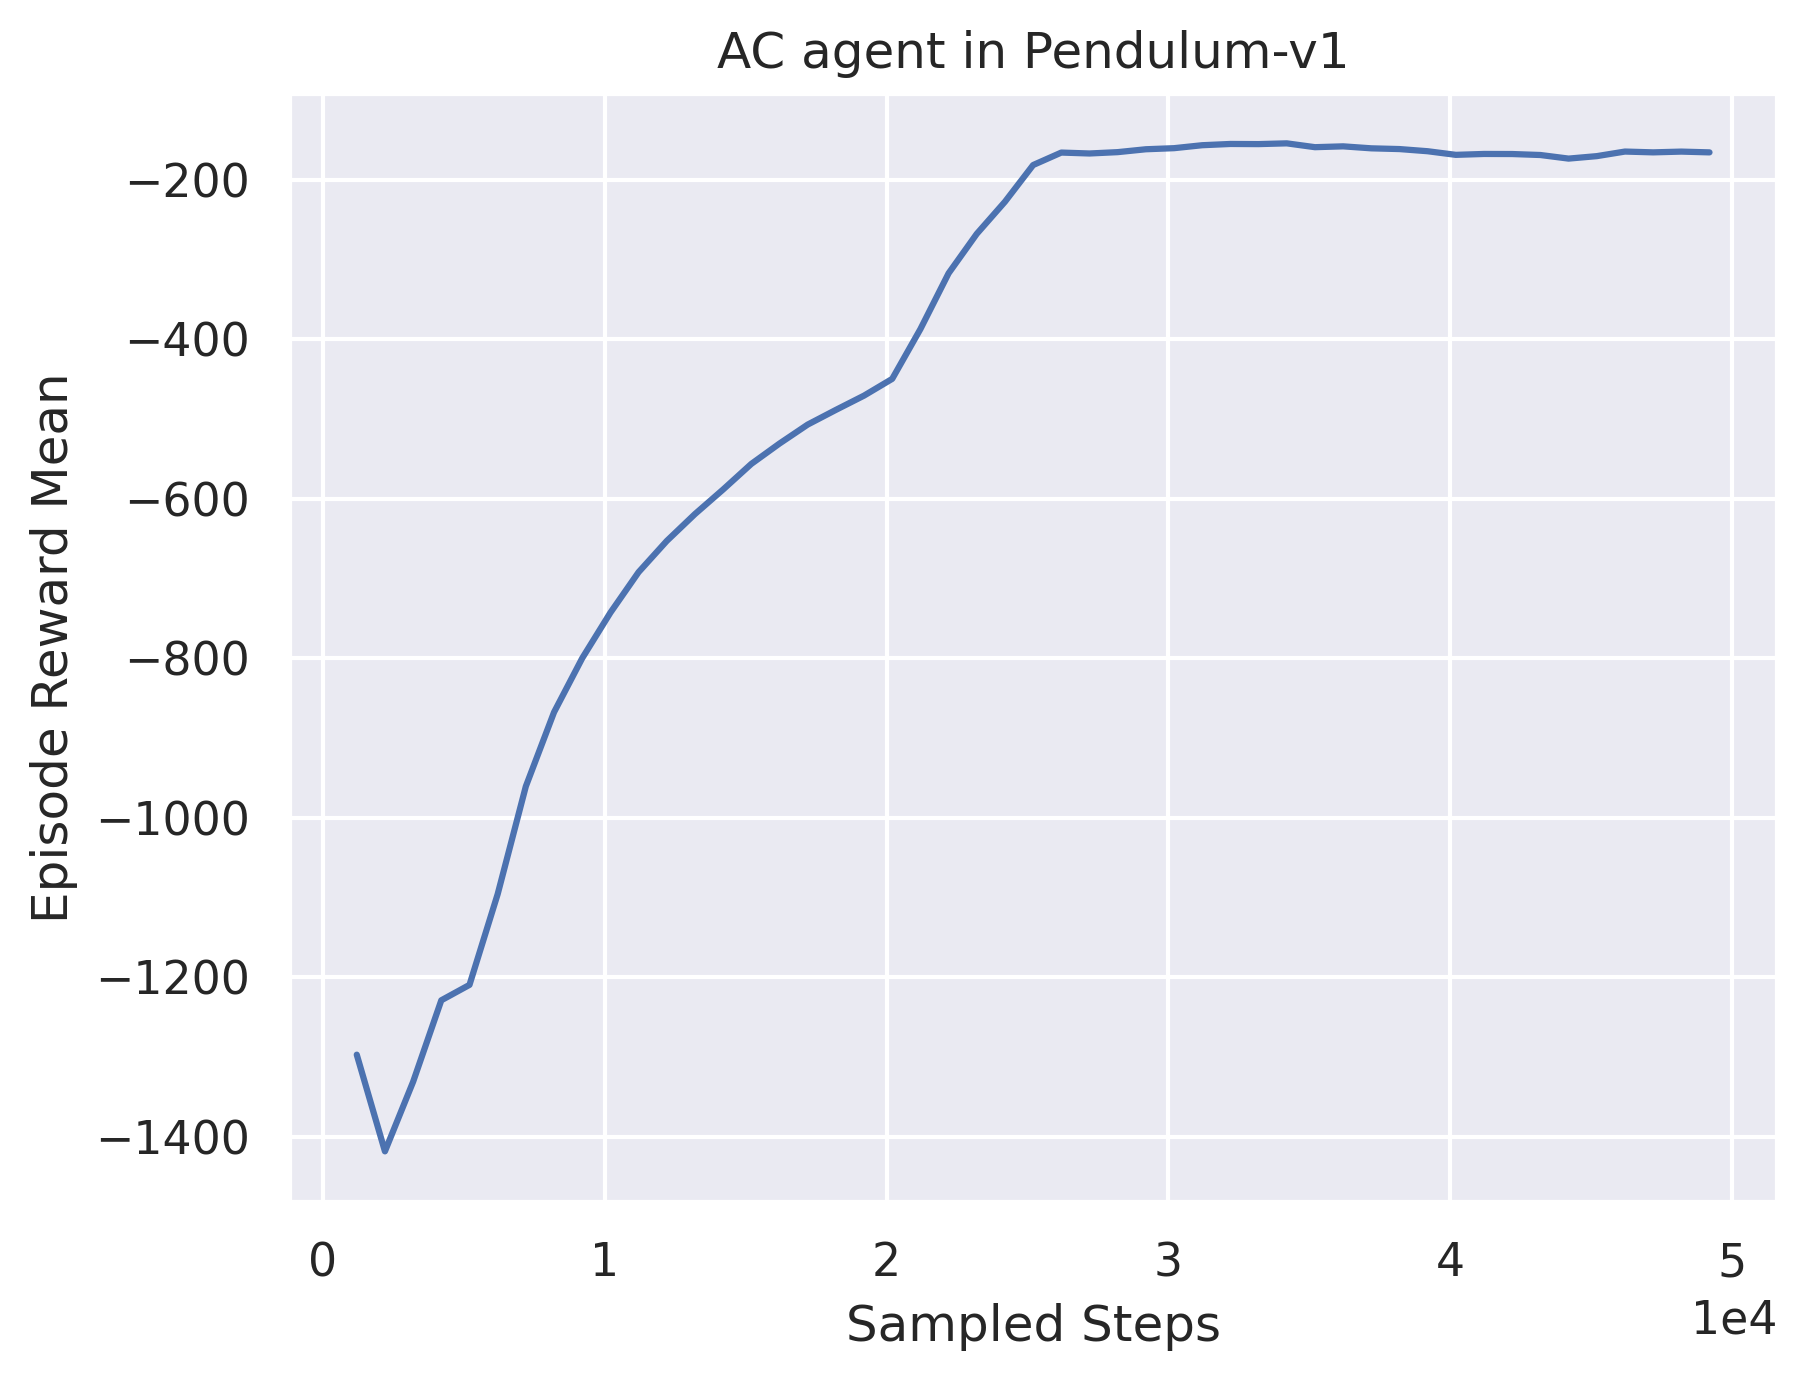

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/AC/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("AC agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-AC.png', format='png', dpi=300, bbox_inches="tight")


In [2]:
!python train_AC.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000

/home/acthegreat/work/CS260D/actor critic with summarization/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.1.2
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20
Training Step:   2%|▍                    | 1912/100000 [00:02<01:53, 861.62it/s][INFO] Episode ended! Scenario Index: 1001 Reason: max step 

 ===== AC Training Step 1999 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 12.122824025712692
  frame_per_second: 749
  log_dir: MetaD

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'reward'],
      dtype='object')


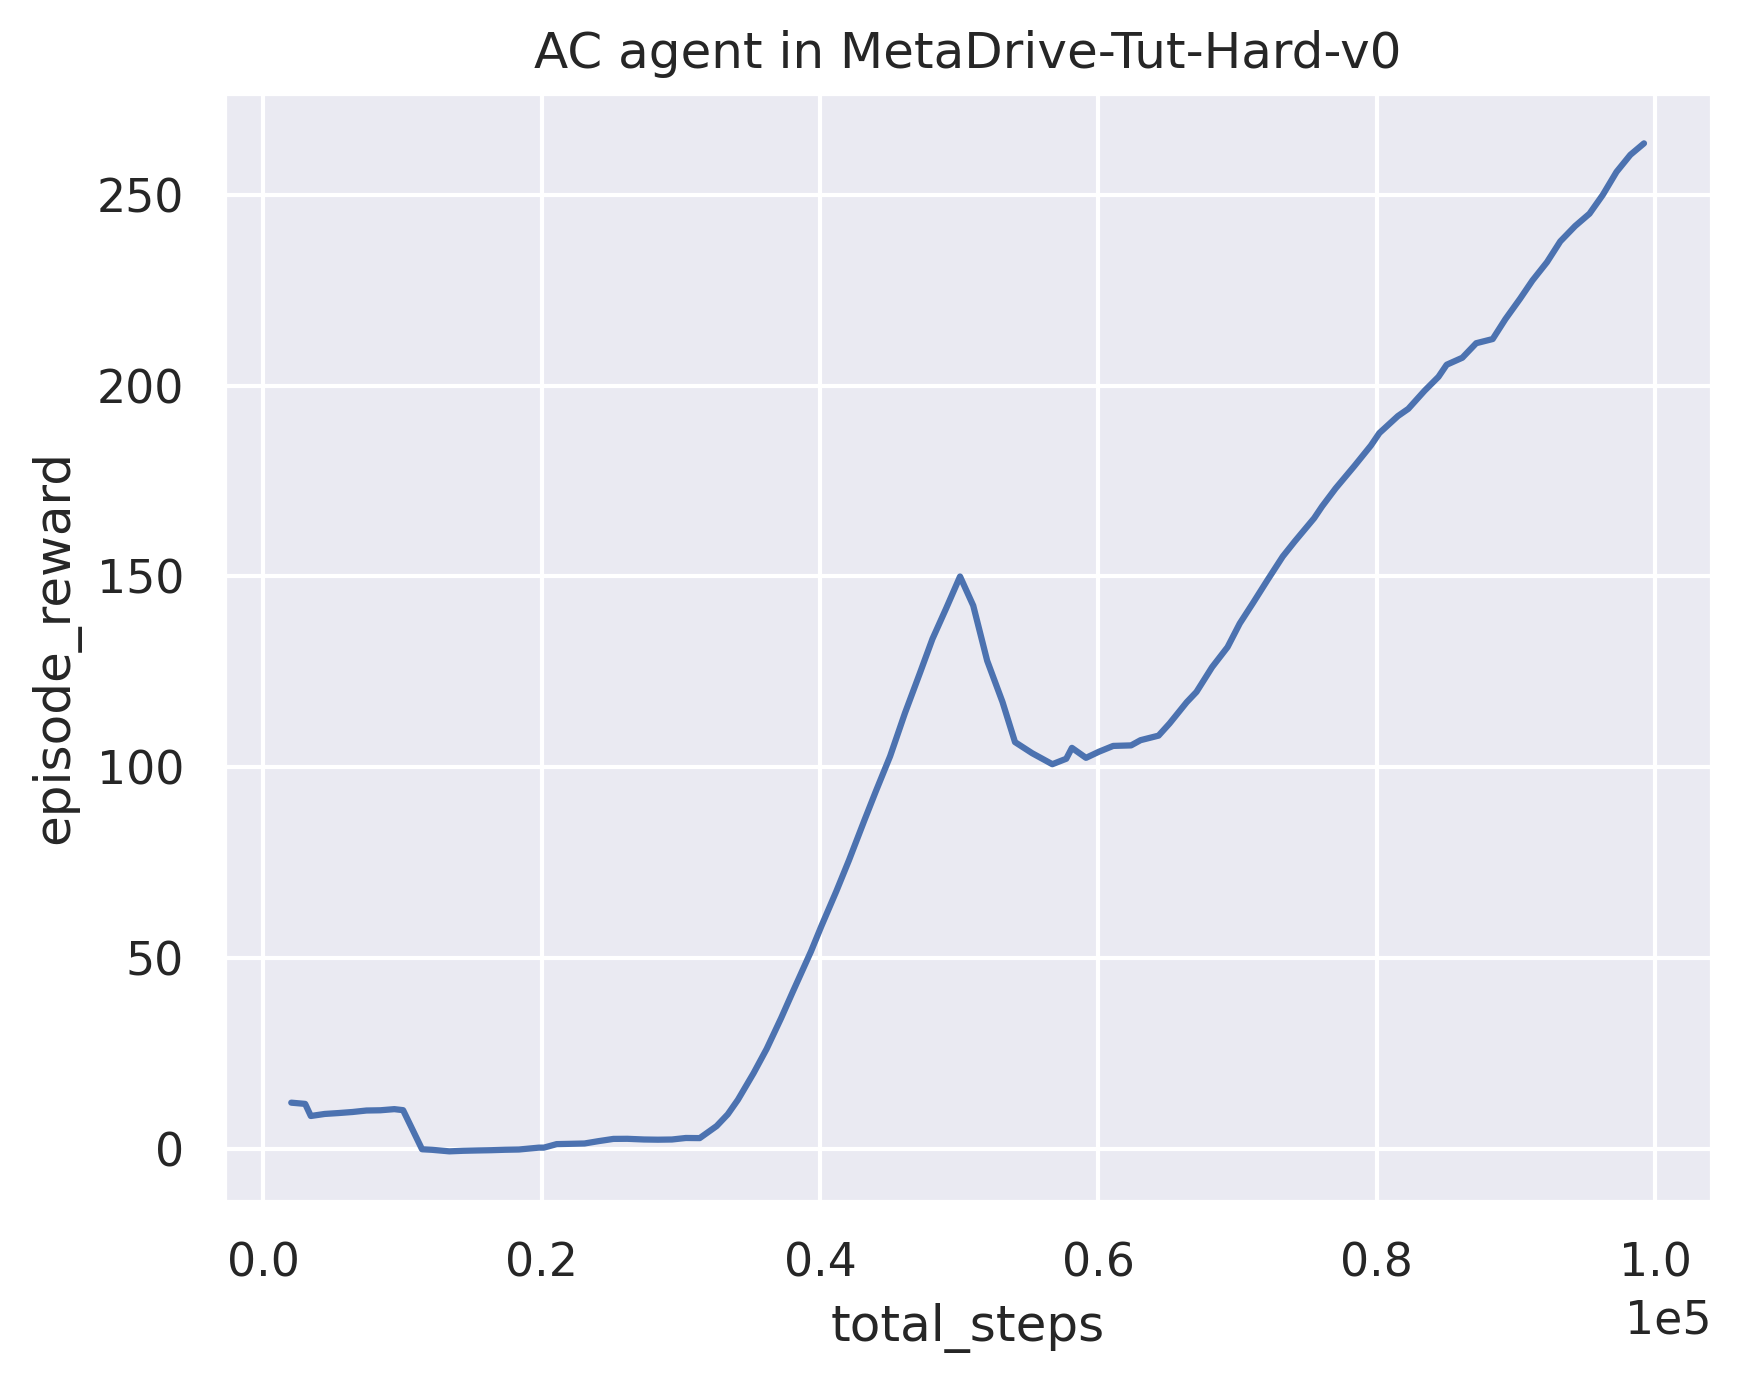

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/AC/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("AC agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-AC.png', format='png', dpi=300, bbox_inches="tight")


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="episode_reward/episode_reward"
# y="success_rate/success_rate"

plot_data = []


AC_df = pd.read_csv("MetaDrive-Tut-Hard-v0/AC/progress.csv")
#dataframe: episode_reward(y), success_rate(y), total_steps(x), total_episode(x)
# sns.lineplot

#dataframe td3
# combine and generate dual graph
# assignment3.ipynb has reference at demo 5 (very end)


# plot_data.append(dict(
#     value=AC_df.episode_reward,
#     total_steps = AC_df.total_steps,
#     label="AC"
# ))



# TD3_df = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")

# plot_data.append(dict(
#     value=TD3_df.iloc[-1]["episode_reward"],
#     total_steps = TD3_df.iloc[-1]["total_steps"],
#     label="td3"
# ))


# plot_data = pd.DataFrame(plot_data)
    

# # df = pd.concat(dfs)
# # df = df.reset_index()

# plt.figure(dpi=300)
# sns.set("paper", "darkgrid")
# ax = sns.lineplot(
#     data=plot_data,
#     hue="label",
#     x="total_steps",
#     y="value"
# )
# ax.set_title("AC vs TD3 on MetaDrive-Tut-Hard-V0")
# ax.set_ylabel("Episodic Reward")
# ax.set_xlabel("Total Steps")
# ax.legend(fontsize=8, loc="upper right")

# plt.savefig('generalization-td3.png', format='png', dpi=300, bbox_inches="tight")


# Note: The following figure is for reference used only, you don't need to repreduce it.

In [6]:
!python train_ACS.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 10000 \
--lr 1e-3

/home/acthegreat/work/CS260D/actor critic with summarization/core
Training Step:   0%|                                  | 0/50000 [00:00<?, ?it/s]
 ===== ACS Training Step 1199 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: -1436.4968050470916
  frame_per_second: 15351
  log_dir: Pendulum-v1
  target_q: .nan
  total_episodes: 6
  total_steps: 1199
  total_time: 0.07813739776611328

Training Step:   3%|▌                   | 1556/50000 [00:00<00:03, 15551.97it/s]Trainer is saved at <Pendulum-v1/ACS>. Progress is saved at <Pendulum-v1/ACS/progress.csv>.

 ===== ACS Training Step 2199 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: -1321.5405017578785
  frame_per_second: 15048
  log_dir: Pendulum-v1
  target_q: .nan
  total_episodes: 11
  total_steps: 2199
  total_time: 0.14614558219909668

Training Step:   6%|█▏                  | 3112/50000 [00:00<00:03, 15193.35it/s]
 ===== ACS Training Step 3199 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_re

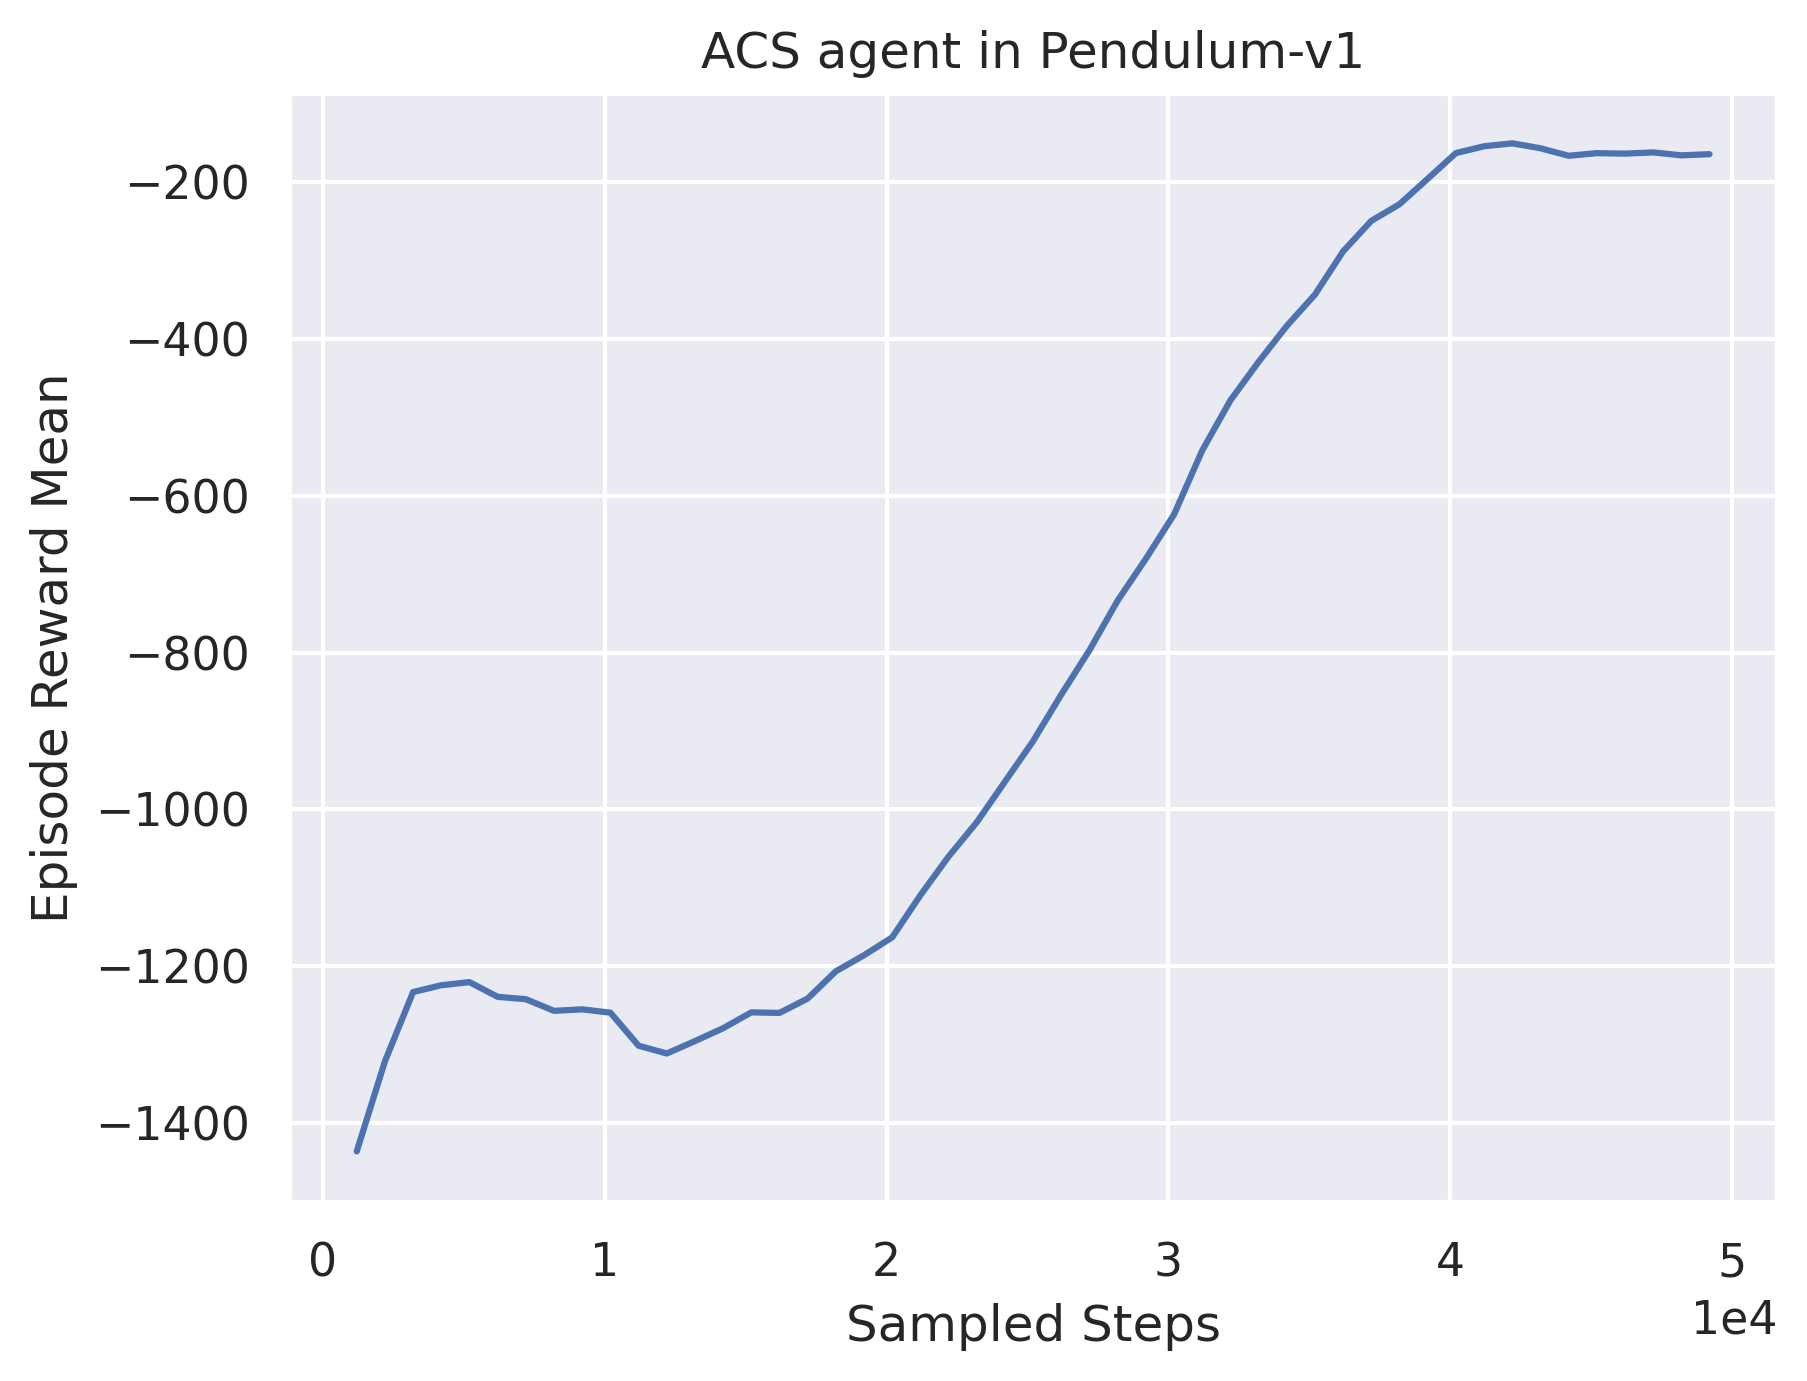

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/ACS/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("ACS agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-ACS.png', format='png', dpi=300, bbox_inches="tight")


In [24]:
!python train_ACS.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000

/home/acthegreat/work/CS260D/actor critic with summarization/core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.1.2
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 1000, Num Scenarios : 20
Training Step:   2%|▍                    | 1982/100000 [00:03<03:49, 427.46it/s][INFO] Episode ended! Scenario Index: 1018 Reason: max step 

 ===== ACS Training Step 1999 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 11.690508040084143
  frame_per_second: 538
  log_dir: Meta

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'reward'],
      dtype='object')


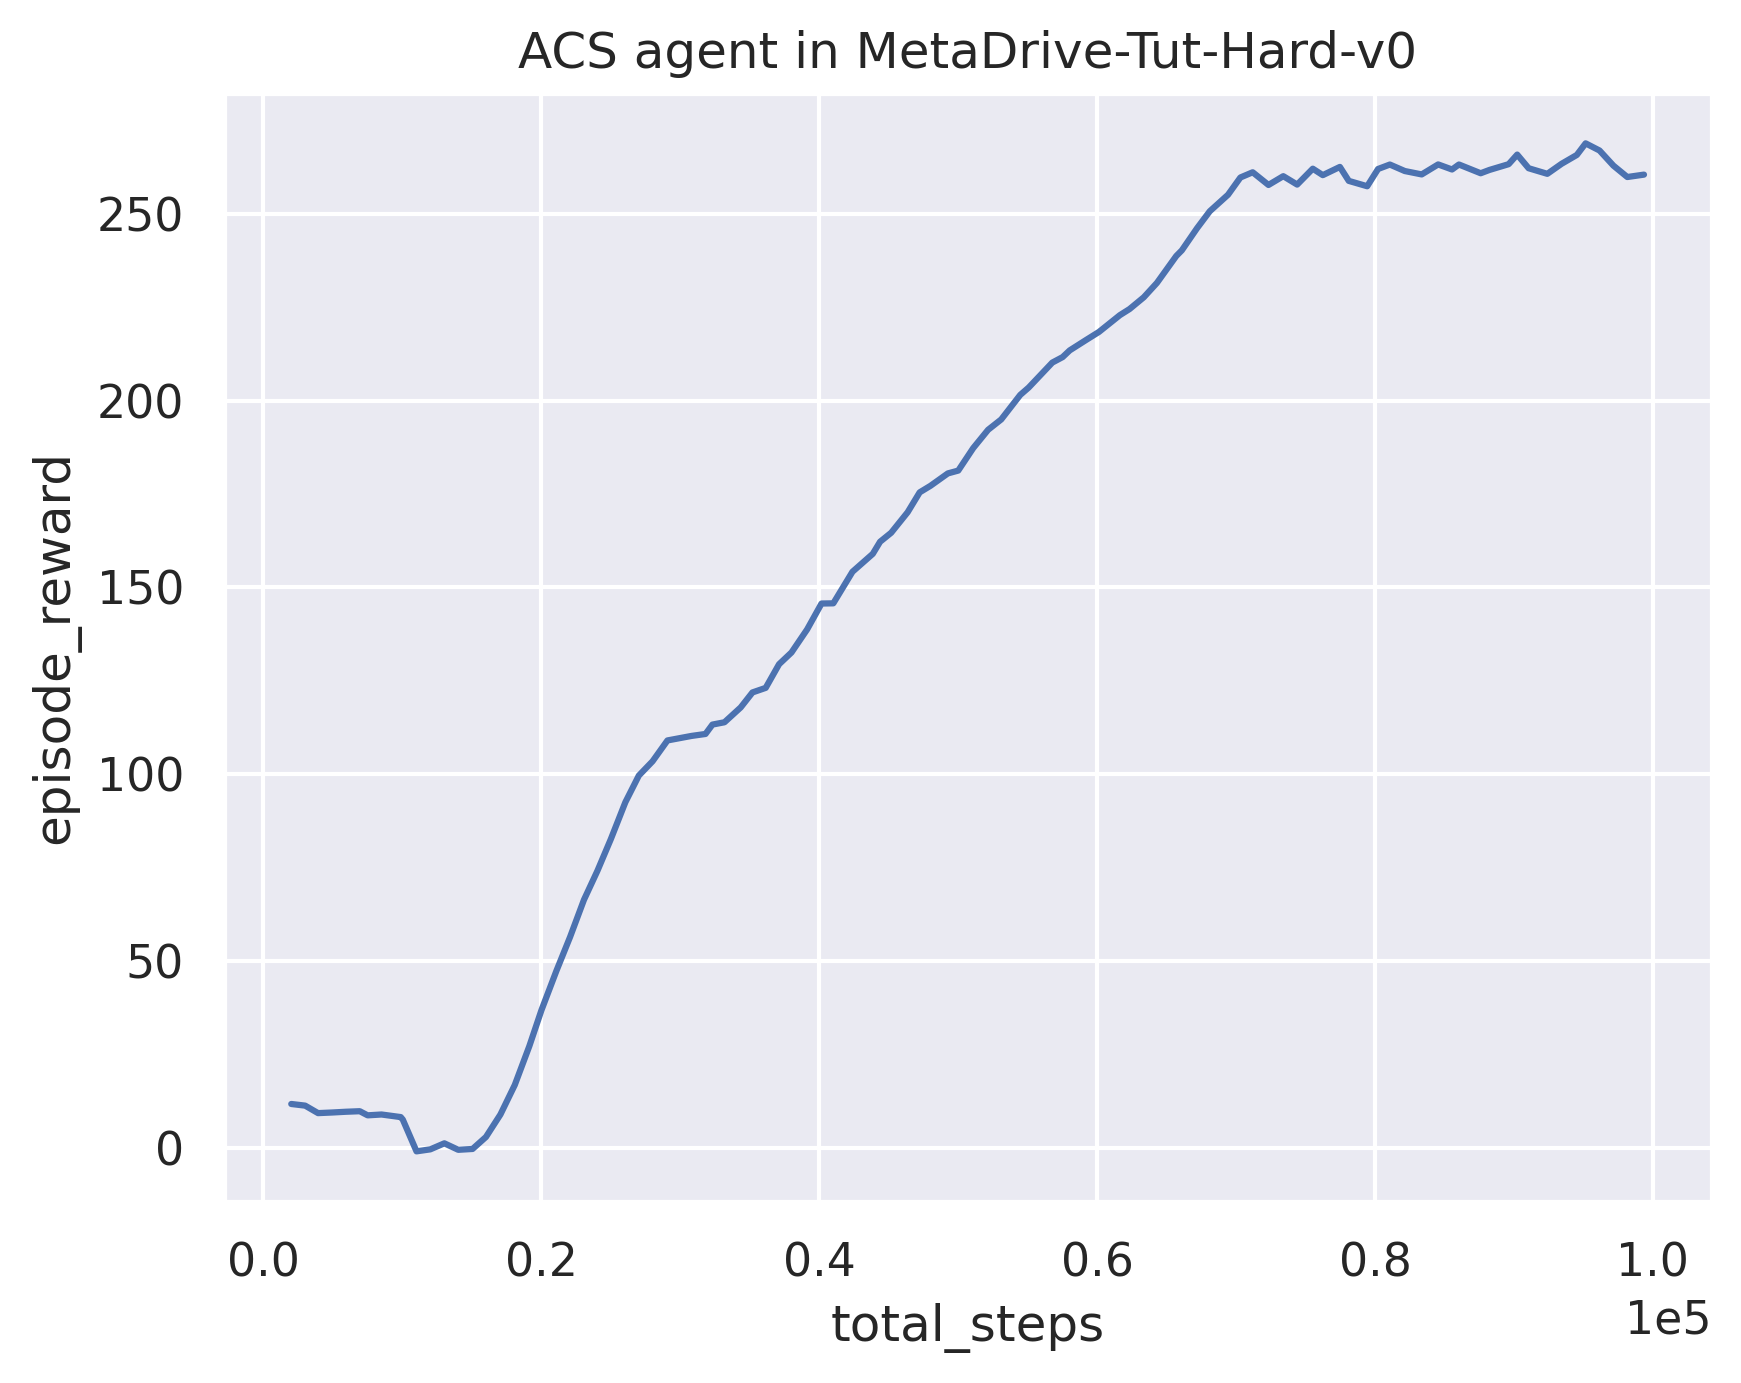

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ACS/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("ACS agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ACS.png', format='png', dpi=300, bbox_inches="tight")


The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'reward'],
      dtype='object')


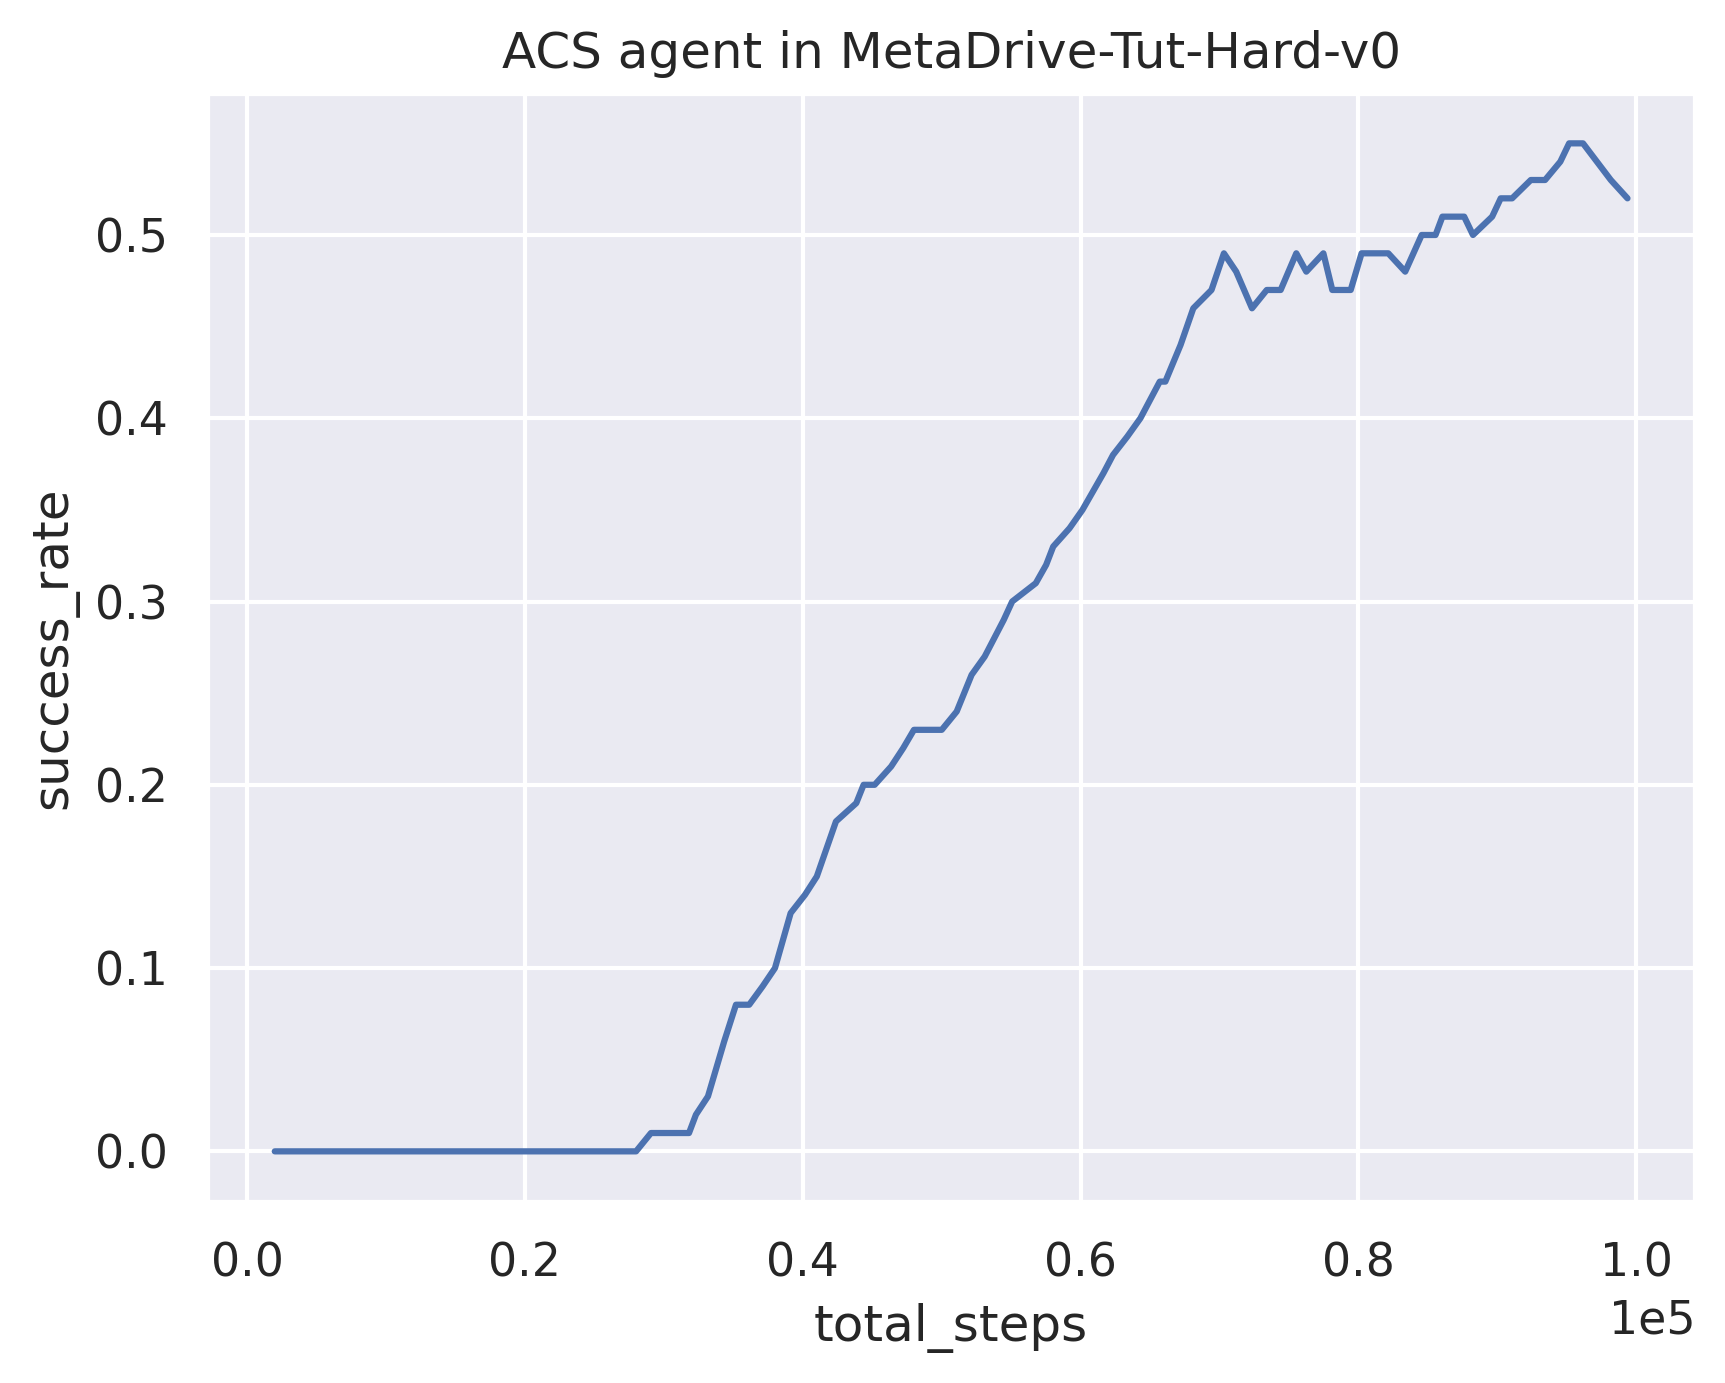

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ACS/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="success_rate"
)
ax.set_title("ACS agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
# ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-ACS-success-rate.png', format='png', dpi=300, bbox_inches="tight")


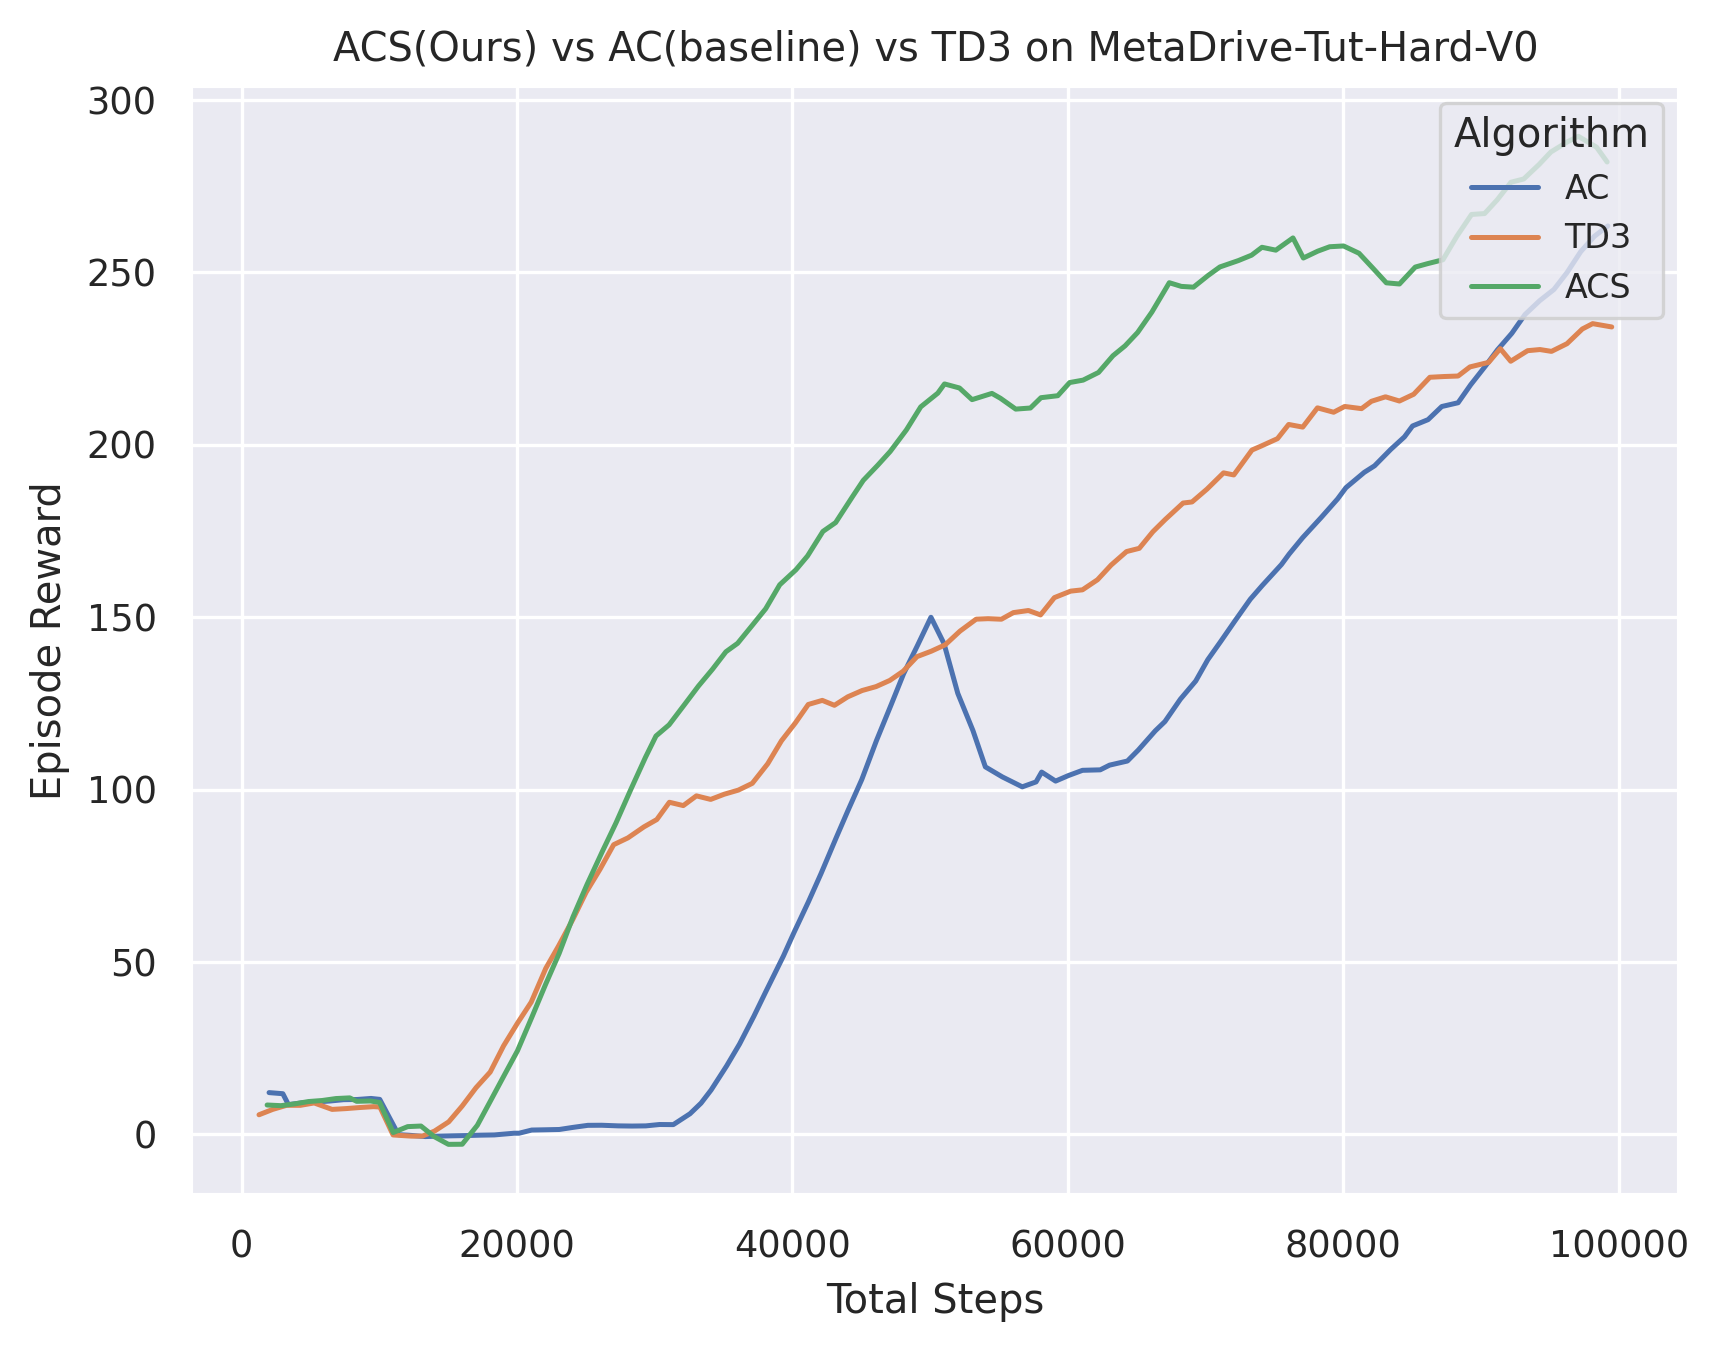

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plot_data = []
AC_df = pd.read_csv("MetaDrive-Tut-Hard-v0/AC/progress.csv")
TD3_df = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
PPO_df = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
ACS_df = pd.read_csv("MetaDrive-Tut-Hard-v0/ACS/progress.csv")

# AC_df
for index, row in AC_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_steps'],
        'label': 'AC'
    })

for index, row in TD3_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_steps'],
        'label': 'TD3'
    })

for index, row in ACS_df.iterrows():
    plot_data.append({
        'value': row['episode_reward'],
        'total_episodes': row['total_steps'],
        'label': 'ACS'
    })

plot_data = pd.DataFrame(plot_data)

plt.figure(dpi=300)
sns.set("paper", style="darkgrid")

# Plot
ax = sns.lineplot(
    data=plot_data,
    x='total_episodes',
    y='value',
    hue='label'
)

# Set the plot title and labels
ax.set_title('ACS(Ours) vs AC(baseline) vs TD3 on MetaDrive-Tut-Hard-V0')
ax.set_xlabel('Total Steps')
ax.set_ylabel('Episode Reward')

# Set the legend
ax.legend(title='Algorithm', fontsize=8, loc='upper right')

# Save the plot
plt.savefig('algorithm comparison episode reward.png', format='png', dpi=300, bbox_inches="tight")

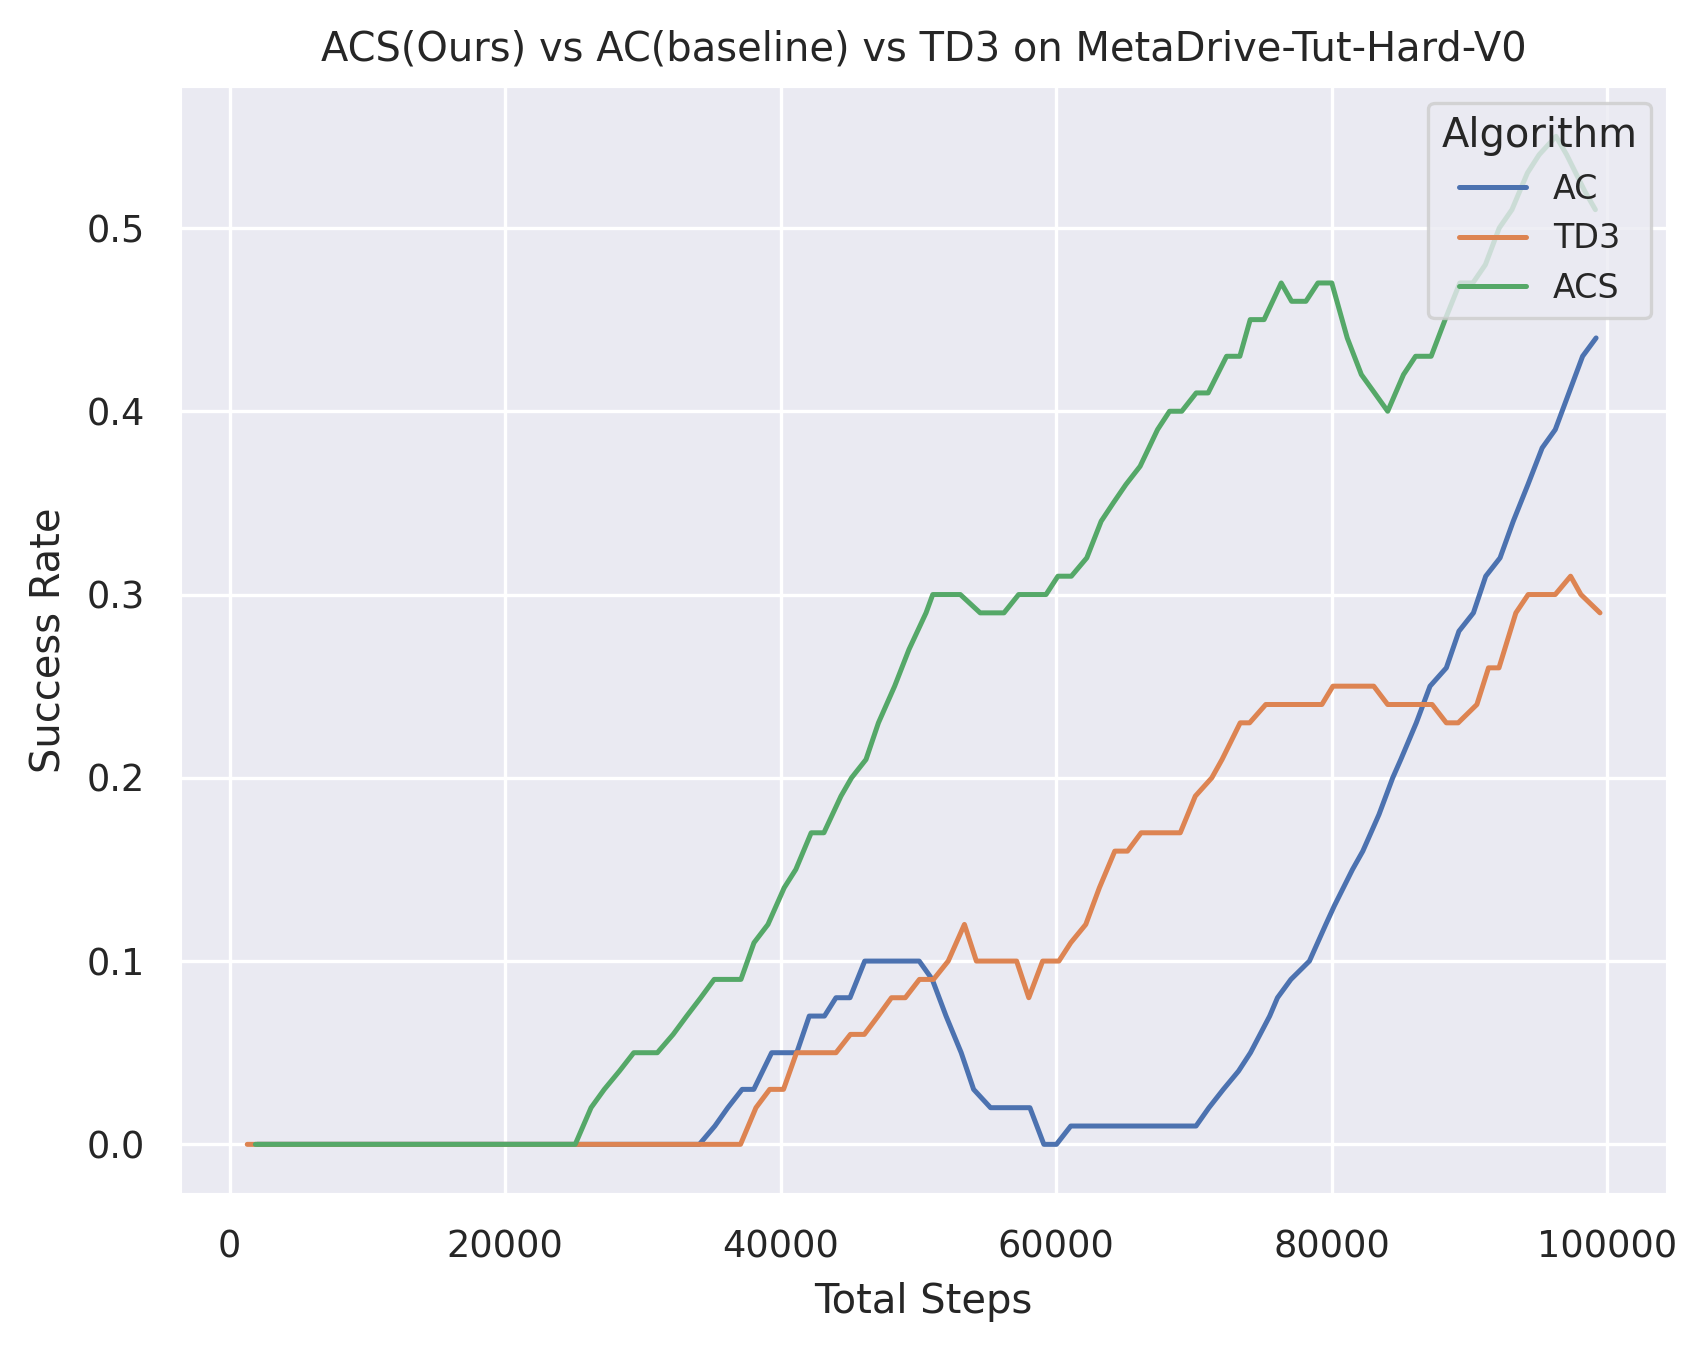

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plot_data = []
AC_df = pd.read_csv("MetaDrive-Tut-Hard-v0/AC/progress.csv")
TD3_df = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
PPO_df = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
ACS_df = pd.read_csv("MetaDrive-Tut-Hard-v0/ACS/progress.csv")

# AC_df
for index, row in AC_df.iterrows():
    plot_data.append({
        'value': row['success_rate'],
        'total_episodes': row['total_steps'],
        'label': 'AC'
    })

for index, row in TD3_df.iterrows():
    plot_data.append({
        'value': row['success_rate'],
        'total_episodes': row['total_steps'],
        'label': 'TD3'
    })

for index, row in ACS_df.iterrows():
    plot_data.append({
        'value': row['success_rate'],
        'total_episodes': row['total_steps'],
        'label': 'ACS'
    })

plot_data = pd.DataFrame(plot_data)

plt.figure(dpi=300)
sns.set("paper", style="darkgrid")

# Plot
ax = sns.lineplot(
    data=plot_data,
    x='total_episodes',
    y='value',
    hue='label'
)

# Set the plot title and labels
ax.set_title('ACS(Ours) vs AC(baseline) vs TD3 on MetaDrive-Tut-Hard-V0')
ax.set_xlabel('Total Steps')
ax.set_ylabel('Success Rate')

# Set the legend
ax.legend(title='Algorithm', fontsize=8, loc='upper right')

# Save the plot
plt.savefig('algorithm comparison success rate.png', format='png', dpi=300, bbox_inches="tight")